Часть 1. Приоритизация гипотез.
Проверка гипотез чаще всего стоит дорого, а ресурсов не хватает. Придётся выбрать, что будем тестировать, а чему скажем «нет». Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируют. 

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [138]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [20]:
pd.set_option('display.max_colwidth',0)

In [21]:
# загружаем данные о гипотезах из CSV-файла в переменную 
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
    hypothesis = pd.read_csv('hypothesis.csv', sep=',')

In [22]:
#  посмотрим датафрейм 
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [23]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Типы данных соответствуют значениям столбцов, пропущенных значений нет. Для удобства приведем наименования столбцов к нижнему регистру


In [24]:
hypothesis.columns = hypothesis.columns.str.lower()

In [25]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Рассмотрим методы упорядочивания экспериментов ICE и RICE. 
ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач: ICE SCORE = Impact * Confidence / Efforts. 

In [26]:
# посчитаем ICE для гипотез. Добавим полученные значения ICE к существующей таблице.
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']


In [27]:
# посмотрим результат, отсортируем их по убыванию приоритета
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Итак, на первом месте - 9 гипотеза о запуске акции на скидку в день рождения, также перспективными оказалась 1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" гипотезы.

У метода ICE есть модификация RICE (R от англ. reach, «охват»): Reach * Impact * Confidence / Efforts.

In [28]:
# посчитаем RICE для гипотез. Добавим полученные значения RICE к существующей таблице.
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [29]:
# посмотрим результат, отсортируем их по убыванию приоритета
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Применив фреймворк RICE для приоритизации гипотез, мы видим, что приоритизация гипотез при применении RICE вместо ICE изменилась. Самой приоритетной оказалась гипотеза 8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", далее перспективными оказалась гипотезы под номерами 3 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", 1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 7 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". Так получилось, потому что параметр Reach - охват пользователей по 10-балльной шкале у гипотезы 8 имеет максимальное значение 10 и охватывает максимальное количество пользователей интернет-магазина.


Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Данные для второй части
Файл /datasets/orders.csv. Скачать датасет
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [30]:
# загружаем данные результатов A/B теста и сохраним их в переменные 
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    orders = pd.read_csv('orders.csv', sep=',')
    visitors = pd.read_csv('visitors.csv', sep=',')

In [31]:
# создадим функцию для просмотра общей информации о датафреймах
def get_info(name_df):
    for df in name_df:
        display(df.info())
        display(df.head())
        display(df.describe())
    return    

In [32]:
# передадим функции наименования датафреймов
name_df = [visitors, orders]
get_info(name_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [33]:
# проверим датафреймы на наличие явных дубликатов
print('Количество дубликатов в таблице visitors:', visitors.duplicated().sum())
print('Количество дубликатов в таблице orders:', orders.duplicated().sum())

Количество дубликатов в таблице visitors: 0
Количество дубликатов в таблице orders: 0


Пропущенных значений и явных дубликатов в датафреймах нет, необходимо изменить тип данных в столбцах "date" в таблицах, а также приведем наименования столбцов "transactionId" и "visitorId" к змеиному регистру. 

In [34]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [35]:
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId': 'visitor_id'}, inplace = True )

In [36]:
# проверяем
get_info(name_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [51]:
# проверим наличие пользователей, которые вошли в обе группы исследования

orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').count()


group    58
dtype: int64

In [54]:
# список пользователей, которые вошли в обе группы
double_users = orders.groupby('visitor_id').agg({'group' : 'nunique'})\
.reset_index().query('group > 1')['visitor_id'].unique()

In [55]:
# исключаем из датафрейма этих пользователей
orders = orders.query('visitor_id not in @double_users')

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 

    date — дата;
    group — группа A/B-теста (A или B);
    orders — кумулятивное количество заказов на указанную дату в указанной группе;
    buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
    revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
    visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [56]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.
Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:

In [57]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [58]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия


In [59]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])


In [60]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [61]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим график кумулятивной выручки по группам. Сделайте выводы и предположения

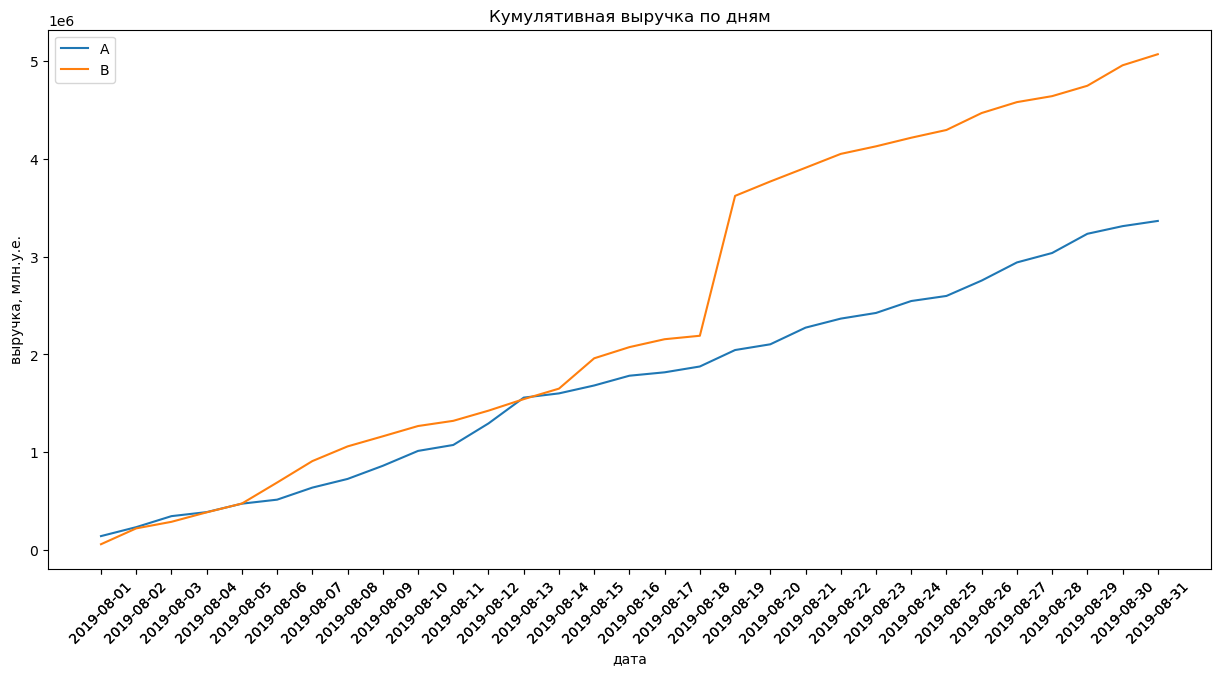

In [66]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,7))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('дата')
plt.ylabel('выручка, млн.у.е.')
plt.title('Кумулятивная выручка по дням')
plt.xticks(cumulativeData['date'], rotation=45)
plt.show()

In [67]:
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

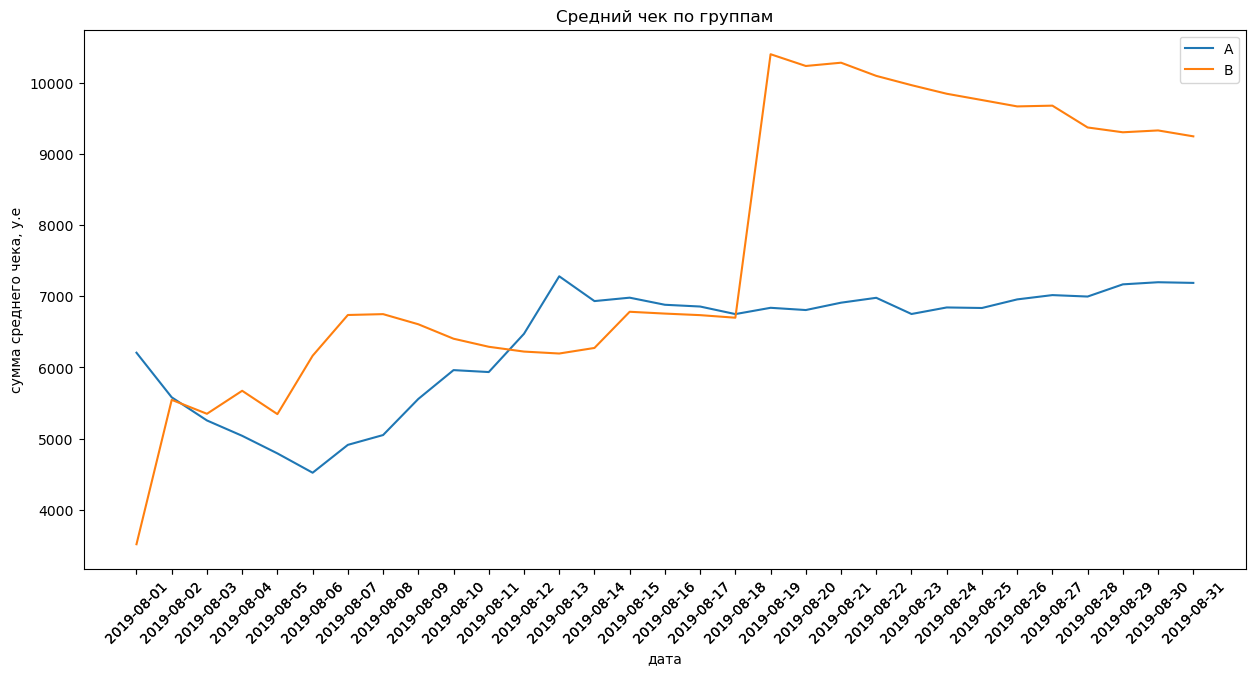

In [71]:
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('сумма среднего чека, у.е')
plt.title('Средний чек по группам')
plt.xticks(cumulativeData['date'], rotation=45)
plt.show()

 Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B теста 18.08.2019 попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Построим график относительного различия для среднего чека

In [72]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


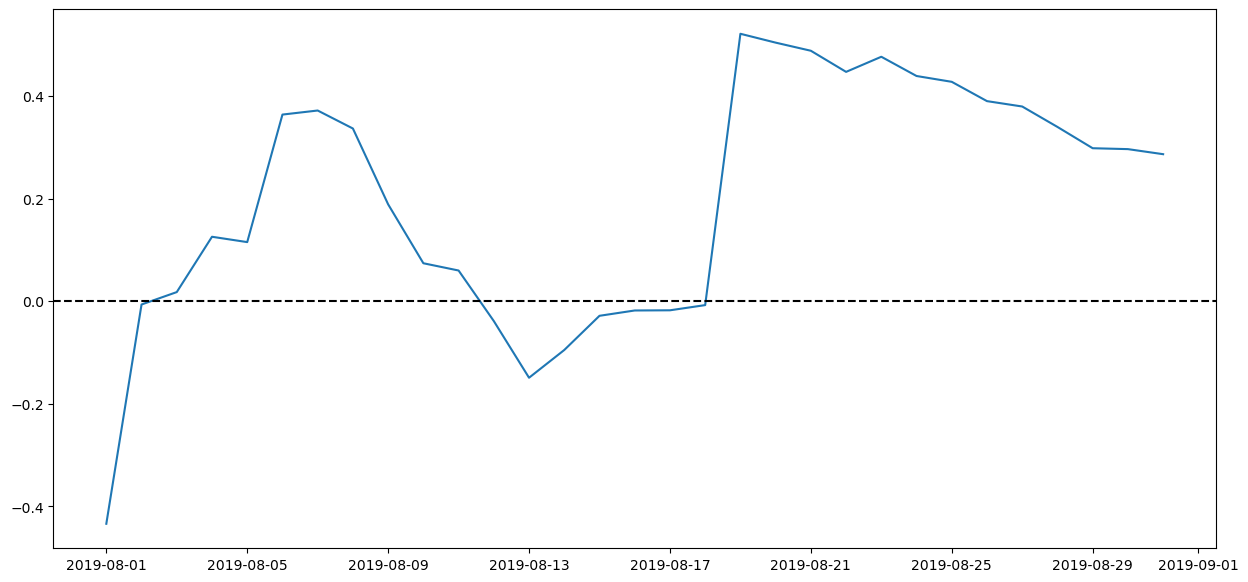

In [73]:
# cтроим отношение средних чеков
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.
Аналогично проанализируем график кумулятивного среднего количества заказов на посетителя по группам.

In [74]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


In [75]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


In [76]:
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


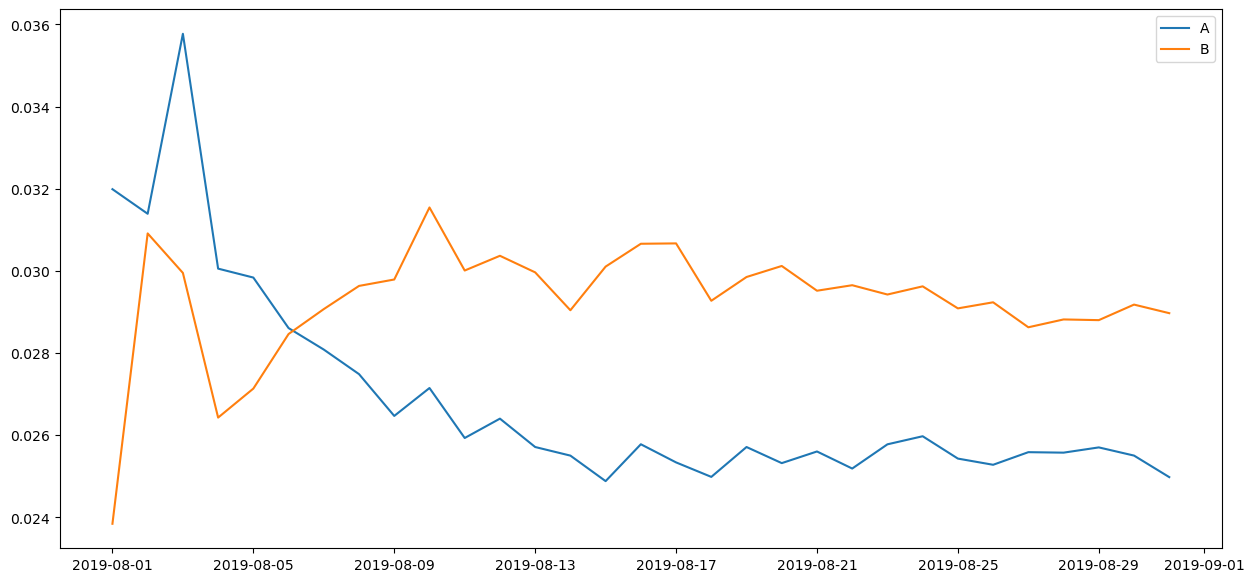

In [83]:
# строим графики
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


Группы колебались около одного значения, но затем у группы B среднее количество заказов вырвалось вперёд и зафиксировалось, а у группы A — просело, но тоже зафиксировалось.

Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

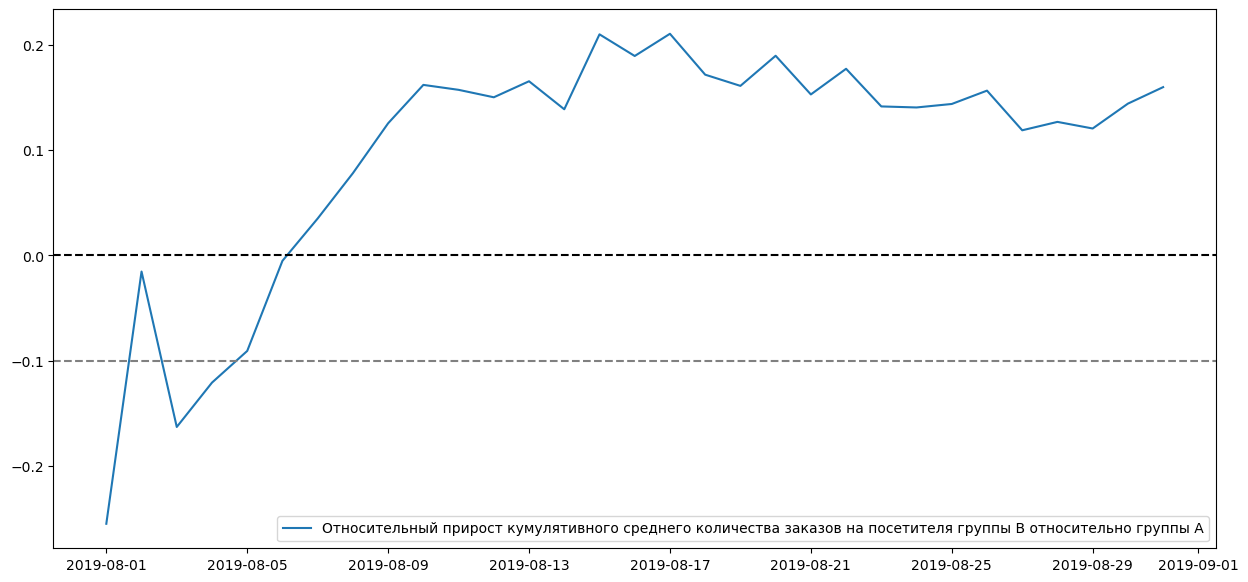

In [86]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом среднее количество заказов на посетителя для группы B снова уменьшалось, но теперь постепенно растёт
В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. Сделаем это в следующем шаге

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [103]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']


In [104]:
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


(array([937.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

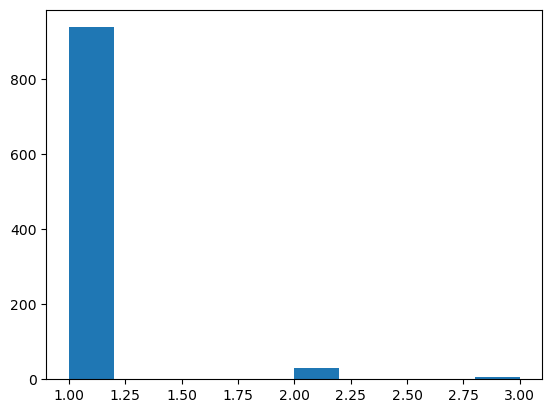

In [106]:
plt.hist(ordersByUsers['orders']) 

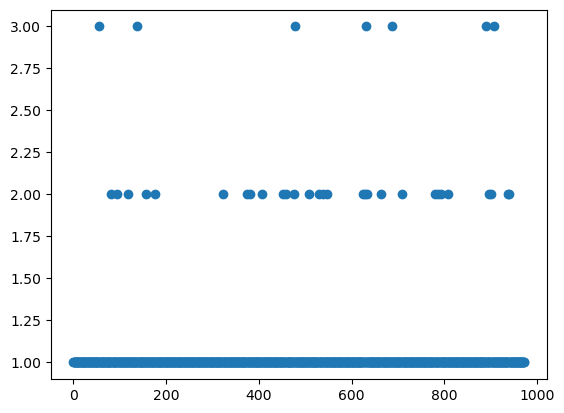

In [105]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

Пользователей, заказавших более 2 раз, совсем мало. Они вполне могут быть аномалиями. 2 заказа - много или мало? ответим на этот вопрос, посчитав 95 и 99 персентили

In [107]:
display(np.percentile(ordersByUsers['orders'], [95, 99]))

array([1., 2.])

Не более 1% пользователей совершали более одного заказа. Пользователи очень редко совершают даже вторую покупку. Это не очень хорошо. Примем за аномалию 3 заказа и посмотрим, в какой группе чаще встречаются пользователи, совершившие вторую покупку

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

# Среди первых 10 строк цены заказов находятся в диапазоне от 730 до 4008 рублей. Кроме двух — заказ с transaction_id 3797467345 составил 9759 у.е. и заказ с transaction_id 1576988021 составил 13710 у.е. ! 
Если такой дорогой заказ попадёт в одну из групп теста, он сразу же исказит результаты и сделает победителем ту группу, где оказался. При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно.
Такие аномально дорогие заказы следует удалять из теста. Можно провести и анализ самых дешёвых заказов. Однако из-за маленькой стоимости они слабо влияют на средний чек. В этом уроке анализировать дешёвые заказы не б

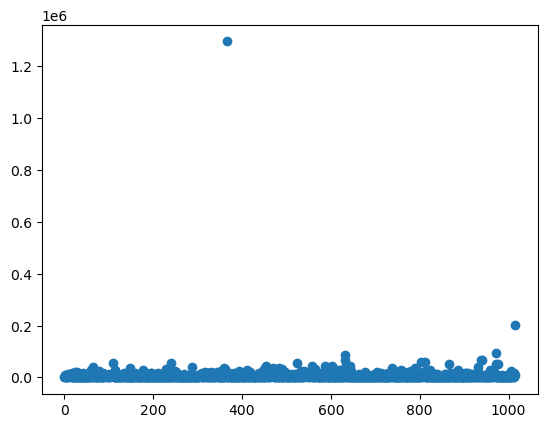

In [109]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

In [112]:
# сделаем срез данных, задав значение revenue больше 200000 у.е.
display(orders.query('revenue > 200000'))


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Всё, как предполагали: есть 2 аномально дорогих заказов.  По графику можно выбрать границу аномальных заказов свыше 200000. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


In [100]:
display(np.percentile(orders['revenue'], [95, 99]))

array([26785., 53904.])

Не более 5% заказов дороже 26785 у.е. и не более 1% дороже 53904 у.е. Будем считать заказы дороже 53904 аномальными


Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. 
Сделайте выводы и предположения.

Изучите устройство таблицы data: выведите первые 5 строк таблицы. По аналогии с кодом в уроке создайте переменные 
ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 
Объявите переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. Возьмите код из урока в качестве примера. 
Посчитайте статистическую значимость различия среднего количества заказов по результатам теста. Примените тест Манна-Уитни. 
Выведите p-value для сравнения среднего между группами. Округлите p-value до 5 знаков после запятой. 
Вычислите и выведите относительное различие в среднем между группами. Округлите до 3 знаков после запятой.

In [130]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


создадим таблицу data
Напомним названия столбцов данных:
date — дата;
ordersPerDateA — количество заказов в выбранную дату в группе A;
revenuePerDateA — суммарная выручка в выбранную дату в группе A;
ordersPerDateB — количество заказов в выбранную дату в группе B;
revenuePerDateB — суммарная выручка в выбранную дату в группе B;
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
visitorsPerDateA — количество пользователей в выбранную дату в группе A;
visitorsPerDateB — количество пользователей в выбранную дату в группе B;
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [131]:
# создадим таблицу data
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [132]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [133]:
# создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], 
# где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 
ordersByUsersA = orders[orders['group'] == 'A']\
    .groupby('visitor_id', as_index=False)\
    .agg({'transaction_id': pd.Series.nunique})
ordersByUsersB = orders[orders['group'] == 'B']\
    .groupby('visitor_id', as_index=False)\
    .agg({'transaction_id': pd.Series.nunique})

In [134]:
# переименуем столбцы
ordersByUsersA.columns = ['user_id', 'orders']
ordersByUsersB.columns = ['user_id', 'orders']

In [135]:
display(ordersByUsersA.head())
display(ordersByUsersB.head())

,user_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,user_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [136]:
# Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов 
# пользователя, а пользователям без заказов — нули
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [139]:
# Выведите p-value для сравнения среднего между группами. Округлите p-value до 5 знаков после запятой. 
display("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

'0.01102'

Напомним, что в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().

In [140]:
# Вычислите и выведите относительное различие в среднем между группами. Округлите до 3 знаков после запятой
display("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


'0.160'

P-value меньше 0.05, поэтому нулевую гипотезу отвергаем. На основе анализа сырых данных можно сказать, что в среднем количестве заказов есть статистически значимые различия. Относительный прирост среднего количества заказов группы B к конверсии группы А составил 16%

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


In [141]:
# Выведите p-value для сравнения средних чеков между группами. Округлите p-value до трёх знаков после запятой.
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))


'0.829'

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [142]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))


'0.829'

In [143]:
# А ещё найдём относительные различия в среднем чеке между группами:
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


'0.287'

P-value 0.83 - больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие в среднем чеке между группами составило 29%. Скорее всего, это связано с выбросами

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.


Приступаем к подготовке очищенных от аномалий данных.
Напомним, что 95-й и 99-й перцентили средних чеков равны 26785 и 53904 у.е. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя. 
Примем за аномальных пользователей тех, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 30 000 рублей. Так мы уберём  менее 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.


In [145]:
# Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)

In [150]:
# и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. 
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']

In [151]:
# Объединим их в таблице abnormalUsers, удалив дубликаты, отсортируем по возрастанию. 
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [153]:
abnormalUsers.head(10)

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
58      611059232
751     689129267
1137    759473111
77      787824685
654     816783716
dtype: int64

Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

In [155]:
# Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах 
# — не включая аномальных пользователей. 
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [156]:
# Выведим p-value для сравнения среднего количества заказов между очищенными группами. 
display('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

'0.00971'

In [157]:
# Выведим относительный прирост среднего количества заказов очищенной группы B
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'0.187'

Как и в случае с сырыми данными, статистичиская значимость достигнута. Группа В значительно лучше группы А

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [160]:
# Выведем p-value для сравнения средних чеков между очищенными группами. 
display(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


'0.741'

In [162]:
# Выведите относительный прирост среднего чека очищенной группы B
display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'-0.027'

Появилась статистическая значимость различия среднего чека заказов между группами! Это значит, что после удаления выбросов в данных меньше шума; дисперсия снизилась, и даже различие в 0.7% по средним значениям стало статистически значимым.

P-value 0.741 - больше 0.05 - статистически значимых отличий в среднем чеке между группами по прежнему нет. Относительное различие в среднем чеке между группами составило - 3%, т.е. средний чек в группе В снизился на 3%


Вот результаты решённых в этом курсе задач в сборе:
Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий статистически значимое различие есть.
График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения
График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.


Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.